In [189]:
print("Hello Ai developers!")

Hello Ai developers!


### Data review

In [190]:
import pandas as pd 

In [191]:
train_df = pd.read_csv("../database/titanic/train.csv")
test_df = pd.read_csv("../database/titanic/test.csv")
test_answer_df = pd.read_csv("../database/titanic/gender_submission.csv")

In [192]:
train_y = train_df['Survived']

In [193]:
train_df = train_df.drop('Survived', axis=1)

train_df.shape

(891, 11)

In [194]:
train_df = train_df.drop(['Name', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'Ticket'], axis=1)

In [195]:
full_df = pd.concat([train_df, test_df], sort=False)


In [196]:
full_df.shape

(1309, 9)

In [197]:
full_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,NaN,S


In [198]:
full_df.set_index("PassengerId")

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,7.2500,NaN,S
2,1,female,38.0,1,0,71.2833,C85,C
3,3,female,26.0,0,0,7.9250,NaN,S
4,1,female,35.0,1,0,53.1000,C123,S
5,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...
1305,3,male,NaN,0,0,8.0500,NaN,S
1306,1,female,39.0,0,0,108.9000,C105,C
1307,3,male,38.5,0,0,7.2500,NaN,S


In [199]:
full_df.dtypes

PassengerId      int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [200]:
import seaborn as sns

<Axes: ylabel='Frequency'>

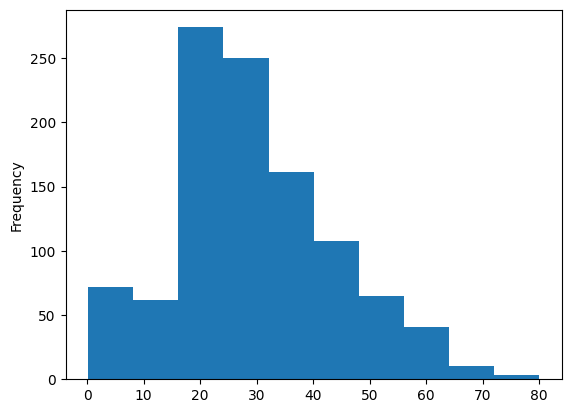

In [201]:
full_df.Age.plot.hist()

<Axes: ylabel='Frequency'>

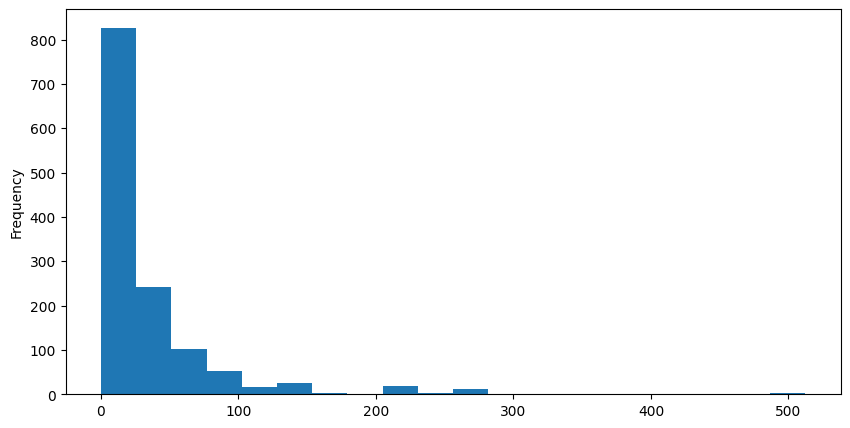

In [202]:
full_df.Fare.plot.hist(bins=20,figsize=(10,5))

<Axes: xlabel='SibSp', ylabel='count'>

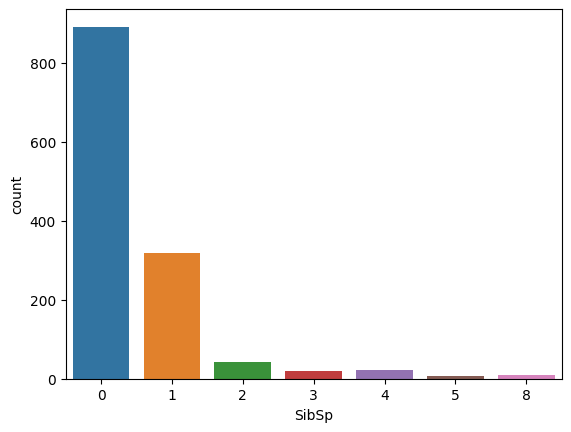

In [203]:
sns.countplot(x="SibSp",data= full_df)

### Data processing

In [204]:
full_df.isnull()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
413,False,False,False,True,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,True,False
416,False,False,False,True,False,False,False,True,False


In [205]:
full_df.isnull().sum()

PassengerId       0
Pclass            0
Sex               0
Age             263
SibSp             0
Parch             0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<Axes: >

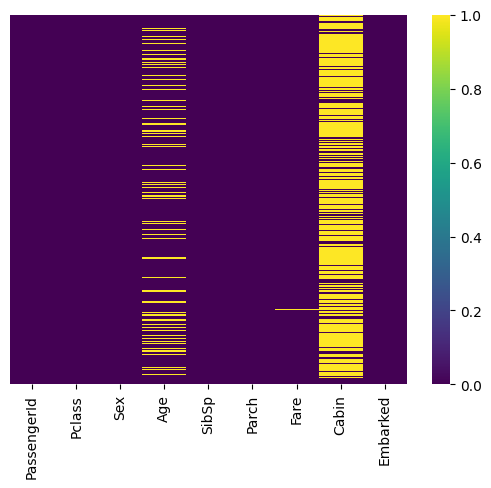

In [206]:
sns.heatmap(full_df.isnull(),yticklabels= False,cmap="viridis")

In [207]:
full_df.drop(["Cabin"],axis=1,inplace=True)

In [208]:
full_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            263
SibSp            0
Parch            0
Fare             1
Embarked         2
dtype: int64

In [209]:
train_df = full_df[:len(train_df)]
test_df = full_df[len(train_df):]

In [210]:
train_df.loc[:,'Survived'] = train_y


C:\Users\reerc\AppData\Local\Temp\ipykernel_12796\4107946576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.loc[:,'Survived'] = train_y


In [211]:
train_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [212]:
train_df.isnull().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [213]:
clean_train= train_df.dropna()

In [214]:
clean_train.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [216]:
test_df.isnull().sum()

PassengerId      0
Pclass         418
Sex            418
Age            504
SibSp          418
Parch          418
Fare           419
Embarked       418
Survived       418
dtype: int64

In [217]:
clean_test= test_df.dropna()

In [218]:
clean_test.isnull().sum()

PassengerId    0.0
Pclass         0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Fare           0.0
Embarked       0.0
Survived       0.0
dtype: float64

In [219]:
clean_test.dtypes

PassengerId      int64
Pclass         float64
Sex             object
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked        object
Survived       float64
dtype: object

In [220]:
train_clean_one_hot = pd.get_dummies(clean_train, columns=["Sex", "Embarked", "Pclass"])

In [221]:
test_clean_one_hot = pd.get_dummies(test_df, columns=["Sex", "Embarked", "Pclass"])

In [222]:
train_clean_one_hot.head()

,PassengerId,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,7.2500,0,False,True,False,False,True,False,False,True
1,2,38.0,1,0,71.2833,1,True,False,True,False,False,True,False,False
2,3,26.0,0,0,7.9250,1,True,False,False,False,True,False,False,True
3,4,35.0,1,0,53.1000,1,True,False,False,False,True,True,False,False
4,5,35.0,0,0,8.0500,0,False,True,False,False,True,False,False,True


In [223]:
train_clean_one_hot.dtypes

PassengerId      int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Survived         int64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Pclass_1          bool
Pclass_2          bool
Pclass_3          bool
dtype: object

In [224]:
test_clean_one_hot.dtypes

PassengerId      int64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Survived       float64
Sex_female        bool
Sex_male          bool
Embarked_C        bool
Embarked_Q        bool
Embarked_S        bool
Pclass_1.0        bool
Pclass_2.0        bool
Pclass_3.0        bool
dtype: object

Our datas is ready to be fed into the furnace.

### Model Training

In [232]:
train_y = train_clean_one_hot["Survived"]

In [233]:
train_x = train_clean_one_hot.drop(["Survived"], axis=1)

In [236]:
from sklearn.linear_model import LogisticRegression

In [237]:
my_model = LogisticRegression(max_iter= 1000)

In [238]:
my_model.fit(train_x,train_y)

LogisticRegression(max_iter=1000)